<a href="https://colab.research.google.com/github/IqbalLx/Machine-Learning-Deep-Learning-Project/blob/master/News_Classification_Iqbal_Maulana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# News Classification
---

##Prepare dataset from Kaggle

In [ ]:
from google.colab import files
files.upload() #Upload kaggle API

In [ ]:
!pip install -q kaggle                                                           # Installing required kaggle library
!mkdir ~/.kaggle                                                                 # Create new Kaggle directory to store our API key in root
!cp kaggle.json ~/.kaggle                                                        # Copy the API to root folder
!chmod 600 ~/.kaggle/kaggle.json                                                 # Give access
!kaggle datasets download -d amananandrai/ag-news-classification-dataset          # Download dataset

 79% 9.00M/11.4M [00:00<00:00, 15.9MB/s]
100% 11.4M/11.4M [00:00<00:00, 16.7MB/s]


In [ ]:
!unzip ag-news-classification-dataset.zip

Archive:  ag-news-classification-dataset.zip
  inflating: test.csv                
  inflating: train.csv               


## Pre-process Dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

news = pd.concat([train_df, test_df], axis=0)
news.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [ ]:
news['Description'] = news['Title'] + ' ' + news['Description']
news.drop('Title', axis=1, inplace=True)
news.head()

,Class Index,Description
0,3,Wall St. Bears Claw Back Into the Black (Reute...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...
4,3,"Oil prices soar to all-time record, posing new..."


### EDA

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')

In [ ]:
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127600 entries, 0 to 7599
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  127600 non-null  int64 
 1   Description  127600 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.9+ MB


In [ ]:
news['Class Index'].unique()

array([3, 4, 2, 1])

In [ ]:
news['length'] = news['Description'].apply(len)

[]

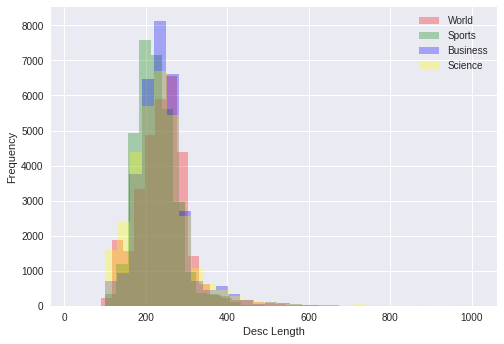

In [ ]:
plt.hist(news[news['Class Index']==1]['length'], bins=30, color='red', alpha=0.3, label='World')
plt.hist(news[news['Class Index']==2]['length'], bins=30, color='green', alpha=0.3,label='Sports')
plt.hist(news[news['Class Index']==3]['length'], bins=30, color='blue', alpha=0.3,label='Business')
plt.hist(news[news['Class Index']==4]['length'], bins=30, color='yellow', alpha=0.3,label='Science')

plt.xlabel("Desc Length")
plt.ylabel("Frequency")

plt.legend()
plt.plot()

Seems all desc lenght pretty equal

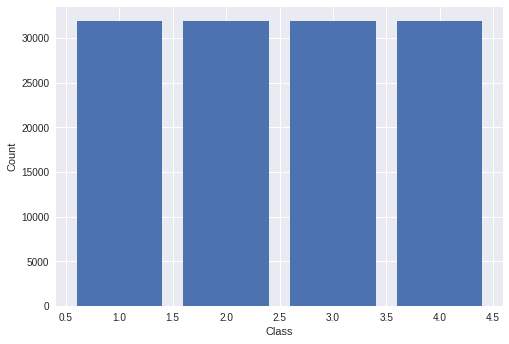

In [ ]:
distribution = news.groupby('Class Index').agg('count').reset_index()
plt.bar(distribution['Class Index'], distribution['Description'])

plt.ylabel('Count')
plt.xlabel('Class')

plt.show()

Really ?! This dataset is very very very balanced, I love it!

### Cleaning

**Main objective:**
- remove stopwords. Stopwords list available on nltk module
- remove punctuation. Punc list abailable on string module

In [ ]:
import string
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

def text_process(body):
    STOPWORDS = stopwords.words('english')

    #remove punctuation
    nopunc = [char for char in body if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    # remove stopwords
    nostopwords = ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

    return nostopwords

In [ ]:
news['clean_desc'] = news['Description'].apply(text_process)

### Splitting

In [ ]:
news['Class Index'] -= 1

In [ ]:
desc = news['clean_desc'].values
label = news['Class Index'].values

train_news, test_news, train_label, test_label = train_test_split(desc, label, test_size=0.2, shuffle=True)

In [ ]:
print("Total train: ", len(train_news))
print("Total test: ", len(test_news))

Total train:  102080
Total test:  25520


## More pre-process dataset

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
NUM_WORDS = 1000
LENGTH = 250
OOV_TOKEN = "<OOV>"
EMBEDDING_DIMS = 16

In [ ]:
tokenizer = Tokenizer(num_words=NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(train_news)

print("total word index: ", len(tokenizer.word_index))

train_seq = tokenizer.texts_to_sequences(train_news)
test_seq = tokenizer.texts_to_sequences(test_news)

train_padded = pad_sequences(train_seq, maxlen=LENGTH, padding='post', truncating='post')
test_padded = pad_sequences(test_seq, maxlen=LENGTH, padding='post', truncating='post')

print("lenght: ", len(train_padded[0]))

total word index:  94303
lenght:  250


In [ ]:
print(train_news[1000])
print(train_padded[1000])
print(train_label[1000])

Dig hype companies dish Whenever mutualfund company makes announcement designed build public 39s excitement interest investors start looking answer one simple question quotWhat 39s big deal
[  1   1 132   1   1   1  16 543   1 817 941 279   2   1 469 218 205 680
   1  17   1   1   1   2 160  61   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   

## Modeling

### Build model

In [ ]:
import tensorflow as tf
from tensorflow.keras.regularizers import l2

In [ ]:
#stop if no improvement on val_acc after 20 epochs
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_acc', patience=50, min_delta=0.0001
    )

In [ ]:
#start with big learning rate and reduce if val_acc plateaued
reduce_on_plateau = tf.keras.callbacks.ReduceLROnPlateau(
                    monitor='val_acc', factor=0.1, patience=20, verbose=0, mode='auto',
                    min_delta=0.0001, cooldown=5, min_lr=1e-8
                )

In [ ]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(input_dim=NUM_WORDS, output_dim=EMBEDDING_DIMS,
                                  input_length=LENGTH),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True, kernel_regularizer=l2(1e-5))),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.GlobalMaxPool1D(),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(lr=1e-2),
    metrics=['acc']
)

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 250, 16)           16000     
_________________________________________________________________
bidirectional_17 (Bidirectio (None, 250, 256)          148480    
_________________________________________________________________
dropout_27 (Dropout)         (None, 250, 256)          0         
_________________________________________________________________
global_max_pooling1d_8 (Glob (None, 256)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 32)                8224      
_________________________________________________________________
dropout_28 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 16)               

### Training

In [ ]:
history = model.fit(train_padded, train_label,
                    epochs=300,
                    batch_size=2048,
                    validation_data=(test_padded, test_label),
                    callbacks=[reduce_on_plateau, early_stop])

Epoch 1/300
50/50 [==============================] - 21s 421ms/step - loss: 1.3204 - acc: 0.3255 - val_loss: 1.0839 - val_acc: 0.4642
Epoch 2/300
50/50 [==============================] - 20s 391ms/step - loss: 1.0134 - acc: 0.4694 - val_loss: 0.9208 - val_acc: 0.5432
Epoch 3/300
50/50 [==============================] - 19s 383ms/step - loss: 0.8737 - acc: 0.5962 - val_loss: 0.7570 - val_acc: 0.6534
Epoch 4/300
50/50 [==============================] - 19s 376ms/step - loss: 0.7967 - acc: 0.6479 - val_loss: 0.6931 - val_acc: 0.7180
Epoch 5/300
50/50 [==============================] - 19s 374ms/step - loss: 0.7503 - acc: 0.7065 - val_loss: 0.6341 - val_acc: 0.7820
Epoch 6/300
50/50 [==============================] - 19s 383ms/step - loss: 0.7030 - acc: 0.7482 - val_loss: 0.5871 - val_acc: 0.7939
Epoch 7/300
50/50 [==============================] - 19s 386ms/step - loss: 0.6662 - acc: 0.7667 - val_loss: 0.5612 - val_acc: 0.8169
Epoch 8/300
50/50 [==============================] - 19s 386ms

## Plot training result

In [ ]:
def plot(history):
  graf = history.history
  graf['epoch'] = history.epoch

  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

  ax[0].plot(graf['epoch'], graf['loss'], label='Loss')
  ax[0].plot(graf['epoch'], graf['val_loss'], label='Val Loss', color='orange')

  ax[0].set_xlabel('Epochs')
  ax[0].set_ylabel('Score')
  ax[0].set_title('Loss')
  ax[0].legend()

  ax[1].plot(graf['epoch'], graf['acc'], label='Accuracy')
  ax[1].plot(graf['epoch'], graf['val_acc'], label='Val Accuracy', color='orange')

  ax[1].set_xlabel('Epochs')
  ax[1].set_ylabel('Score')
  ax[1].set_title('Accuracy')
  ax[1].legend()

  ax[2].plot(graf['epoch'], graf['lr'], label='Learning Rate')

  ax[2].set_xlabel('Epochs')
  ax[2].set_ylabel('Value')
  ax[2].set_title('Learning Rate')

  return plt.show()

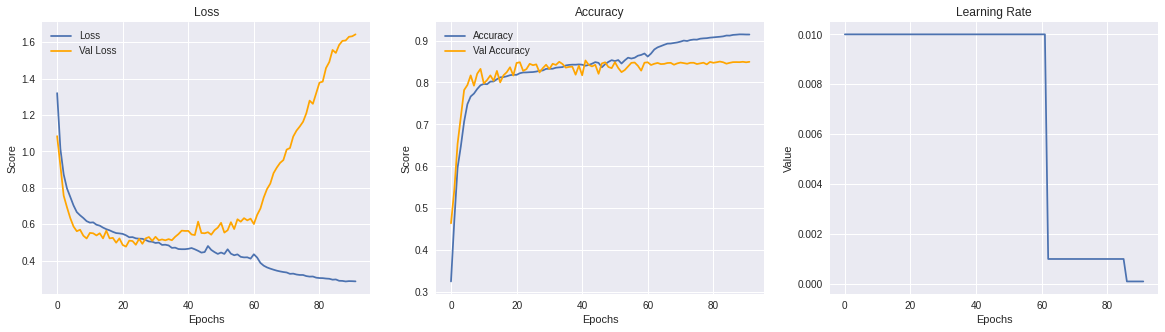

In [ ]:
plot(history)

In [ ]:
print("Overfitting dikit :((")

Overfitting dikit :((
